# (3) Regression Analysis

# Load Data

In [12]:
import pandas as pd
mtcars = pd.read_csv('mtcars.csv', index_col=0)
mtcars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


# Pairwise Correlation

In [9]:
mtcars.corr()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


# Negative Correlation

<AxesSubplot:xlabel='wt', ylabel='mpg'>

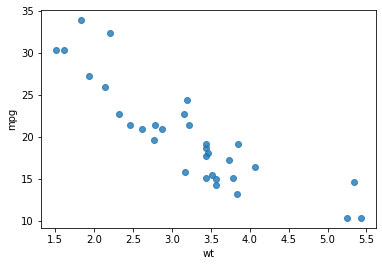

In [10]:
import seaborn as sns
sns.regplot(data = mtcars, x = "wt", y = "mpg", fit_reg=False)

In [14]:
mtcars.wt.corr(mtcars.mpg)

-0.8676593765172279

## Positive Correlation

<AxesSubplot:xlabel='hp', ylabel='disp'>

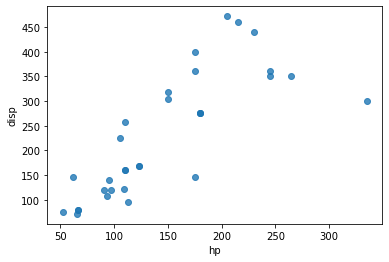

In [16]:
sns.regplot(data = mtcars, x = "hp", y = "disp", fit_reg=False)

In [17]:
mtcars.hp.corr(mtcars.disp)

0.7909485863698065

## No Correlation

<AxesSubplot:xlabel='qsec', ylabel='drat'>

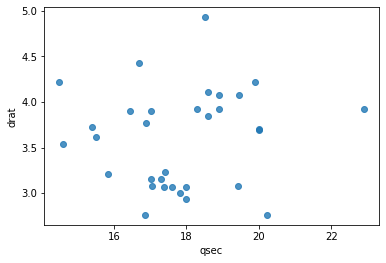

In [20]:
sns.regplot(data = mtcars, x = "qsec", y = "drat", fit_reg=False)

In [21]:
mtcars.qsec.corr(mtcars.drat)

0.09120475965118297

# Separate X and Y

In [23]:
Y = mtcars['mpg']
X = mtcars.drop(columns=['mpg'])

# Simple linear regression

In [25]:
# No intercept
import statsmodels.api as sm
model = sm.OLS(Y, X['wt']).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    mpg   R-squared (uncentered):                   0.720
Model:                            OLS   Adj. R-squared (uncentered):              0.711
Method:                 Least Squares   F-statistic:                              79.58
Date:                Wed, 09 Jun 2021   Prob (F-statistic):                    4.55e-10
Time:                        01:44:00   Log-Likelihood:                         -122.40
No. Observations:                  32   AIC:                                      246.8
Df Residuals:                      31   BIC:                                      248.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
wt             5.2916      0.593      8.921      0.000       4.082       6.501
==============================================================================
Omnibus:                        0.255   Durbin-Watson:                   0.833
Prob(Omnibus):                  0.880   Jarque-Bera (JB):                0.317
Skew:                           0.189   Prob(JB):                        0.854
Kurtosis:                       2.692   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
# Prediction
model.predict()

array([13.86405514, 15.21341929, 12.27656791, 17.01257148, 18.20318691,
       18.30901939, 18.89109804, 16.88028088, 16.66861592, 18.20318691,
       18.20318691, 21.53691009, 19.7377579 , 20.0023391 , 27.78102653,
       28.70176912, 28.28373082, 11.64157302,  8.54597292,  9.71013022,
       13.04385341, 18.62651683, 18.17672879, 20.31983655, 20.34629467,
       10.23929263, 11.32407558,  8.00622726, 16.7744484 , 14.65779876,
       18.89109804, 14.710715  ])

## Simple linear regression - with intercept

In [27]:
X1 = sm.add_constant(X)
X1

,const,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,1.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,1.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,1.0,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,1.0,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,1.0,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,1.0,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,1.0,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,1.0,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,1.0,4,140.8,95,3.92,3.150,22.90,1,0,4,2
Merc 280,1.0,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [28]:
model_1 = sm.OLS(Y,X1).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     13.93
Date:                Wed, 09 Jun 2021   Prob (F-statistic):           3.79e-07
Time:                        01:44:43   Log-Likelihood:                -69.855
No. Observations:                  32   AIC:                             161.7
Df Residuals:                      21   BIC:                             177.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.3034     18.718      0.657      0.518     -26.623      51.229
cyl           -0.1114      1.045     -0.107      0.916      -2.285       2.062
disp           0.0133      0.018      0.747      0.463      -0.024       0.050
hp            -0.0215      0.022     -0.987      0.335      -0.067       0.024
drat           0.7871      1.635      0.481      0.635      -2.614       4.188
wt            -3.7153      1.894     -1.961      0.063      -7.655       0.224
qsec           0.8210      0.731      1.123      0.274      -0.699       2.341
vs             0.3178      2.105      0.151      0.881      -4.059       4.694
am             2.5202      2.057      1.225      0.234      -1.757       6.797
gear           0.6554      1.493      0.439      0.665      -2.450       3.761
carb          -0.1994      0.829     -0.241      0.812      -1.923       1.524
==============================================================================
Omnibus:                        1.907   Durbin-Watson:                   1.861
Prob(Omnibus):                  0.385   Jarque-Bera (JB):                1.747
Skew:                           0.521   Prob(JB):                        0.418
Kurtosis:                       2.526   Cond. No.                     1.22e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
# RMSE
import math
import numpy as np
math.sqrt(np.mean(model_1.resid**2))

2.146904967160943

# Multiple regression

In [30]:
model_2 = sm.OLS(Y, X1[['const','wt','hp']]).fit()
model_2.summary()

#mpg = 37.2-3.88wt - 0.03hp 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     69.21
Date:                Wed, 09 Jun 2021   Prob (F-statistic):           9.11e-12
Time:                        01:45:01   Log-Likelihood:                -74.326
No. Observations:                  32   AIC:                             154.7
Df Residuals:                      29   BIC:                             159.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.2273      1.599     23.285      0.000      33.957      40.497
wt            -3.8778      0.633     -6.129      0.000      -5.172      -2.584
hp            -0.0318      0.009     -3.519      0.001      -0.050      -0.013
==============================================================================
Omnibus:                        5.303   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.071   Jarque-Bera (JB):                4.046
Skew:                           0.855   Prob(JB):                        0.132
Kurtosis:                       3.332   Cond. No.                         588.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""